<a href="https://colab.research.google.com/github/shailu1999/Cats_Vs_Dogs_Image_recognition/blob/master/Predict_Fashion_Classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
tf.__version__

'2.2.0'

In [0]:
#Import train and test data
fashion_train_df = pd.read_csv('/content/drive/My Drive/fashion train.csv',sep=',')
fashion_test_df=pd.read_csv('/content/drive/My Drive/fashion test.csv',sep=',')

In [5]:
fashion_train_df.head(0)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784


In [6]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,...,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0


In [0]:
training_fashion=np.array(fashion_train_df,dtype='float')
testing_fashion=np.array(fashion_test_df,dtype='float')

In [8]:
training_fashion.shape

(60000, 785)

In [9]:
testing_fashion.shape

(10000, 785)

In [10]:
training_fashion

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]])

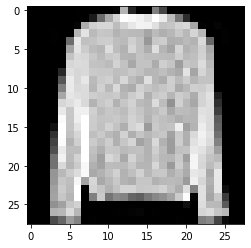

In [11]:
i = random.randint(1,60000)#some random number
plt.imshow(training_fashion[i,1:].reshape((28,28)),cmap='gray')#excluding index 0 (start with index 1). convert to 28x28 pixels

In [0]:
label = training_fashion[i,0]#as first column is needed here

In [13]:
label

2.0

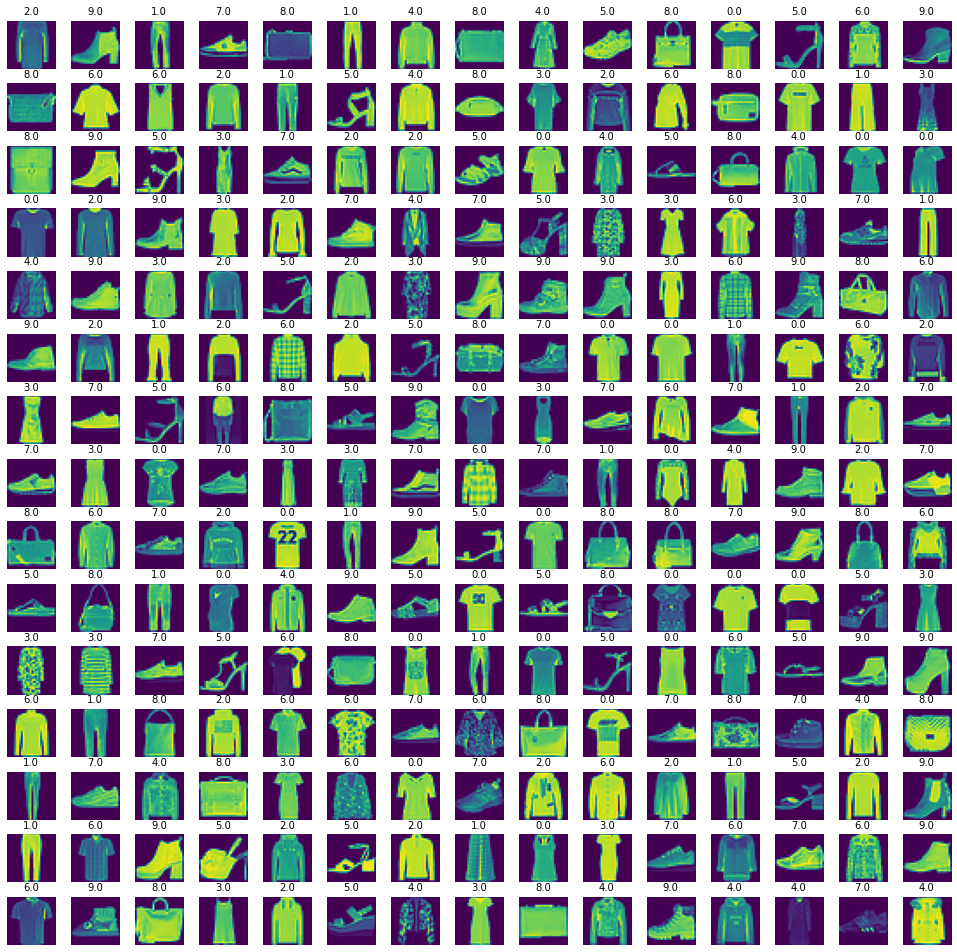

In [14]:
#Plotting a matrix of data
#view more images in a grid format. Specify the dimensions of the grid
w_grid= 15
l_grid= 15 #as, we want to visualize 15 images in the grid

fig, axes= plt.subplots(w_grid,l_grid, figsize=(17,17))
axes =axes.ravel()#flatten the 15x15 matrix into 225 array

len_train=len(training_fashion)#getting the length of our training dataset

#np.arange() - It creates an instance of ndarray with evenly spaced values and returns the reference to it.
for i in np.arange(0,w_grid*l_grid): #here, 15x15 grid. Evenly spaced variables will be created.
  index=np.random.randint(0,len_train)#select a random number, so we get a random index
  #read an display an image with the selected index
  axes[i].imshow(training_fashion[index,1:].reshape((28,28)))
  axes[i].set_title(training_fashion[index,0],fontsize=10) #shows title of every image with actual index/label
  axes[i].axis('off')  #to avoid showing x axis or y axis
plt.subplots_adjust(hspace=0.3) #to create some space

#Labels:
#0 - T-shirt/Tops
#1 - Trouser
#2 - Pullover
#3 - Dress
#4 - Coat
#5 - Sandal
#6 - Shirt
#7 - Sneaker
#8 - Bag
#9 - Ankle Boot

In [0]:
X_train = training_fashion[:,1:]/255 # all rows and columns except the column 0. Then , divide by 255(to normalize it)
y_train = training_fashion[:,0]

In [0]:
X_test=testing_fashion[:,1:]/255
y_test= testing_fashion[:,0]

In [17]:
X_train.shape

(60000, 784)

In [18]:
y_train.shape

(60000,)

In [0]:
#Reshape the input to be in the form of 60000 images , and then, 28x28x1
X_train=X_train.reshape(X_train.shape[0],*(28,28,1))#X_train.shape[0] - 60000, *() - unpacks tuple
X_test=X_test.reshape(X_test.shape[0],*(28,28,1))

In [20]:
X_train.shape

(60000, 28, 28, 1)

In [21]:
X_test.shape

(10000, 28, 28, 1)

In [22]:
from tensorflow.keras import datasets, layers, models
cnn=models.Sequential()

cnn.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(28,28,1)))#32 filters, size of filter is 3x3
cnn.add(layers.MaxPool2D(2,2))

cnn.add(layers.Conv2D(64,(3,3),activation='relu'))
cnn.add(layers.MaxPool2D(2,2))

cnn.add(layers.Conv2D(64,(3,3),activation='relu'))

cnn.add(layers.Flatten())

cnn.add(layers.Dense(64,activation='relu'))#64 neurons
#o/p layer
cnn.add(layers.Dense(10,activation= 'softmax'))#only 10 o/p classes, and softmax is used as it generates probabilities
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [0]:
cnn.compile(loss='sparse_categorical_crossentropy',optimizer='Adam', metrics=['accuracy'])#as we have 10 classes here. Binary crossentropy is used when only 2 classes are used

In [24]:
history = cnn.fit(X_train,y_train, batch_size=500,epochs=50)#batch size is how many images to be fed to the model at once

Epoch 1/50
120/120 [==============================] - 3s 22ms/step - loss: 0.8761 - accuracy: 0.6865
Epoch 2/50
120/120 [==============================] - 3s 21ms/step - loss: 0.4998 - accuracy: 0.8169
Epoch 3/50
120/120 [==============================] - 3s 21ms/step - loss: 0.4305 - accuracy: 0.8437
Epoch 4/50
120/120 [==============================] - 3s 21ms/step - loss: 0.3873 - accuracy: 0.8602
Epoch 5/50
120/120 [==============================] - 3s 21ms/step - loss: 0.3576 - accuracy: 0.8719
Epoch 6/50
120/120 [==============================] - 3s 21ms/step - loss: 0.3346 - accuracy: 0.8805
Epoch 7/50
120/120 [==============================] - 3s 21ms/step - loss: 0.3187 - accuracy: 0.8861
Epoch 8/50
120/120 [==============================] - 3s 21ms/step - loss: 0.3029 - accuracy: 0.8906
Epoch 9/50
120/120 [==============================] - 3s 21ms/step - loss: 0.2895 - accuracy: 0.8961
Epoch 10/50
120/120 [==============================] - 3s 21ms/step - loss: 0.2813 - accura

In [25]:
evaluaton = cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3114 - accuracy: 0.9166


In [26]:
predicted_classes=cnn.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


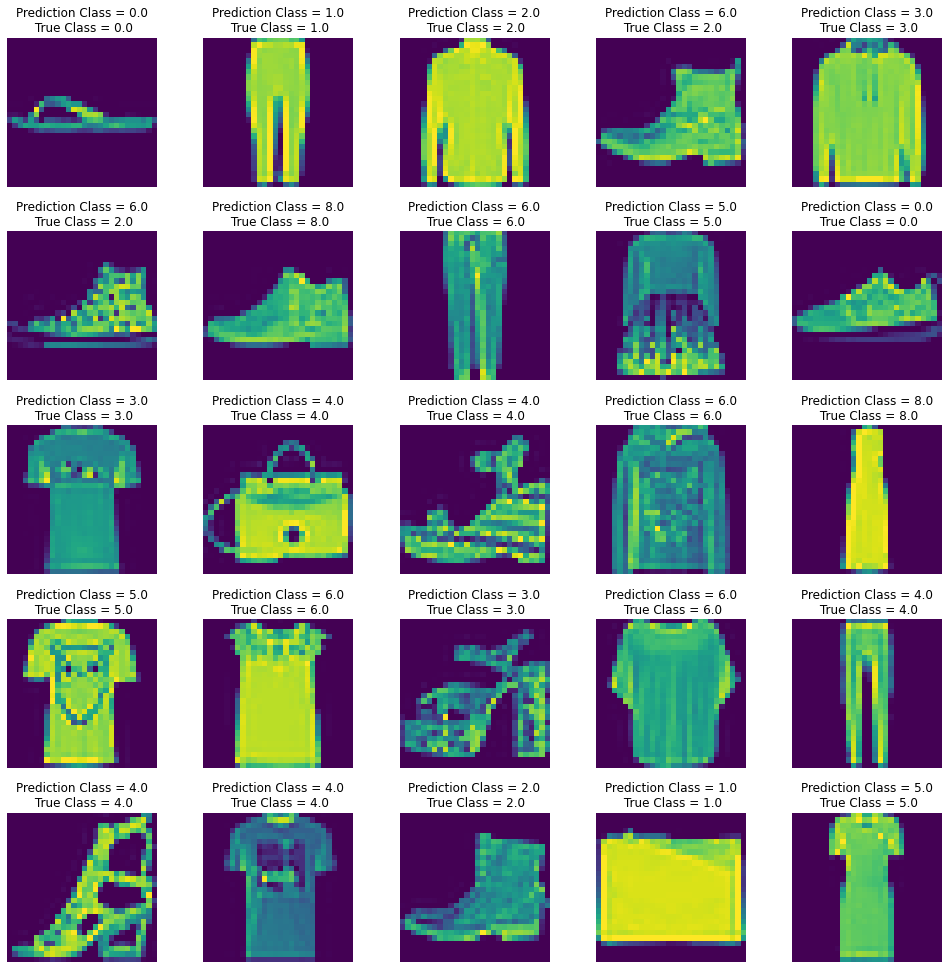

In [27]:
#Plotting predicted class and true class
w= 5
l= 5

fig, axes= plt.subplots(w,l, figsize=(17,17))
axes =axes.ravel()#flatten the 15x15 matrix into 225 array

len_train=len(training_fashion)

for i in np.arange(0,w*l):
  index=np.random.randint(0,len_train)
  axes[i].imshow(training_fashion[index,1:].reshape((28,28)))
  axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i],y_test[i])) #Plotting prediction class and true class
  axes[i].axis('off')  
plt.subplots_adjust(hspace=0.3) 

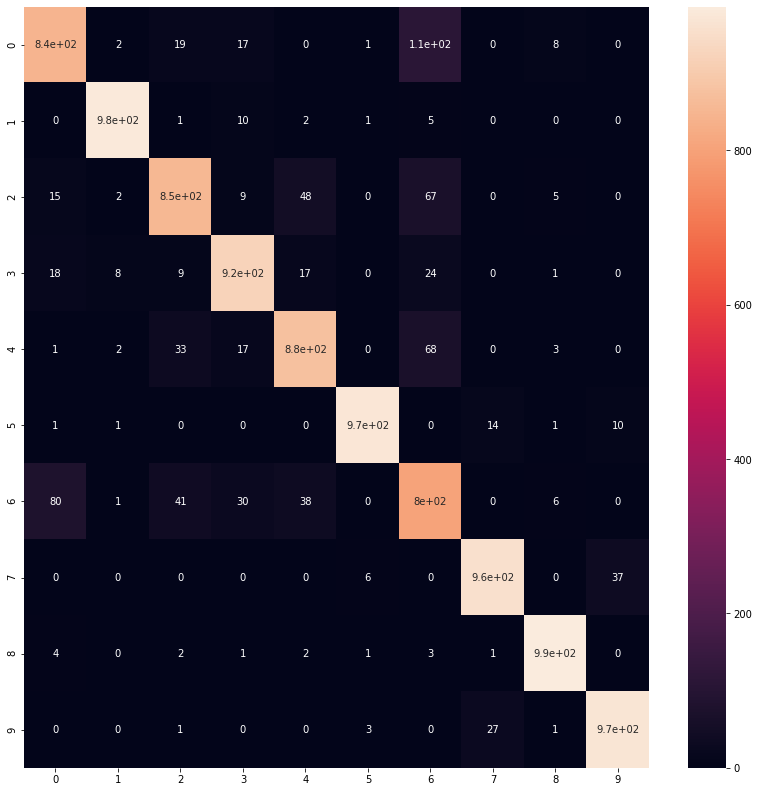

In [28]:
#We are using confusion matrix here, as we need to visualize all the information so that, we can identify how many true positives, false positives, true negatives and false negatives we have
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(14,14))
sns.heatmap(cm, annot=True)

In [29]:
from sklearn.metrics import classification_report

num_classes=10

target_names= ['class {}'.format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.88      0.84      0.86      1000
     class 1       0.98      0.98      0.98      1000
     class 2       0.89      0.85      0.87      1000
     class 3       0.92      0.92      0.92      1000
     class 4       0.89      0.88      0.88      1000
     class 5       0.99      0.97      0.98      1000
     class 6       0.74      0.80      0.77      1000
     class 7       0.96      0.96      0.96      1000
     class 8       0.98      0.99      0.98      1000
     class 9       0.95      0.97      0.96      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

